# Largest Eigenvalue Eigenvevtor
I had this idea that we can find the largest eigenvalue eigenvector of a gap spectrum by just letting the Hamiltonian act repeatedly on a random state.

This will be only true if the largest eigenvalue is separated by a gap from the rest of the states.

Can I use this procedure to see if the spectrum has a gap?

## Addendum: 
The procedure can be adapted to solve for GS as well. Trick is to replace $H$ by $H^{-1}$ and use Gaussian elimination in the iteration step.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# just two energies
H = np.array([[2,0],[0,1]])

vec = np.random.rand(H.shape[0])

iter_max = 100
for i in range(iter_max):
    vec = H @ vec/np.linalg.norm(vec)

print(vec)

[2.00000000e+00 2.00008933e-29]


In [7]:
# two energies with a coupling 
H = np.array([[2,0.5],[0.5,1]])

vec = np.random.rand(H.shape[0])

iter_max = 100
for i in range(iter_max):
    vec = H @ vec/np.linalg.norm(vec)

print(vec)

[2.03910078 0.8446232 ]


5801 9.99509851239748e-06
energy 3.999032530201737


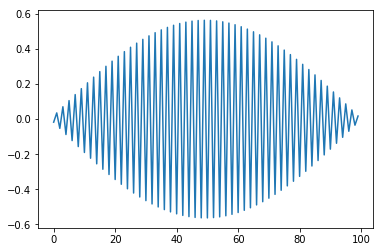

In [53]:
# tight-binding energy
t = 1.0
N = 100
H = np.diag(2*t*np.ones(N)) + np.diag(-t*np.ones(N-1),-1) + np.diag(-t*np.ones(N-1),1)

vec = np.random.rand(H.shape[0])
old_vec = vec.copy() 

iter_max = 10000
for i in range(iter_max):
    vec = H @ vec/np.linalg.norm(vec)
    err = np.linalg.norm(vec-old_vec)
    old_vec = vec
    if err < 1e-5:
        print(i,err)
        break
plt.plot(vec)
print("energy",(vec.T @ H @ vec)/(vec.T @ vec))

18 6.300069949477691e-09
energy 0.010094629168057328


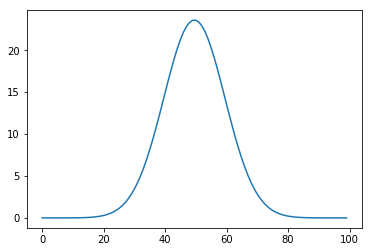

In [85]:
# Harmonic Oscillator ?
# start with TB and add parabolic potential to the diagonal ?

t = 1.0
N = 100

x = np.linspace(-N/2,N/2,N)/N
V = x**2  
H = np.diag(2*t*np.ones(N)) + np.diag(-t*np.ones(N-1),-1) + np.diag(-t*np.ones(N-1),1) + np.diag(V) 

vec = np.random.rand(H.shape[0])
old_vec = vec.copy() 

iter_max = 10000
for i in range(iter_max):
    # for largest energy state
    #vec = H @ vec/np.linalg.norm(vec)
    
    # for GS
    vec = np.linalg.solve(H,vec/np.linalg.norm(vec))
    err = np.linalg.norm(vec-old_vec)
    old_vec = vec
    if err < 1e-8:
        print(i,err)
        break
plt.plot(vec)
print("energy",(vec.T @ H @ vec)/(vec.T @ vec))

15 6.970033603327776e-09
energy 0.0036159206968889


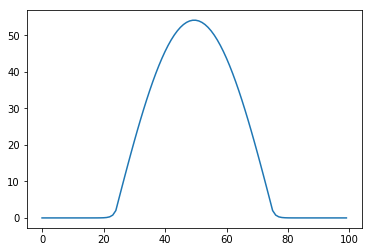

In [84]:
# particle in a box

t = 1.0
N = 100

x = np.linspace(-N/2,N/2,N)/N
V = [0 if -0.25 < ele < 0.25 else 1.0 for ele in x]  
H = np.diag(2*t*np.ones(N)) + np.diag(-t*np.ones(N-1),-1) + np.diag(-t*np.ones(N-1),1) + np.diag(V) 

vec = np.random.rand(H.shape[0])
old_vec = vec.copy() 

iter_max = 10000
for i in range(iter_max):
    # for largest vec
    #vec = H @ vec/np.linalg.norm(vec)
    
    # for ground state
    vec = np.linalg.solve(H,vec/np.linalg.norm(vec))
    
    err = np.linalg.norm(vec-old_vec)
    old_vec = vec
    if err < 1e-8:
        print(i,err)
        break
plt.plot(vec)
print("energy",(vec.T @ H @ vec)/(vec.T @ vec))

1293 9.905945341167448e-09
energy 0.01006158253501262


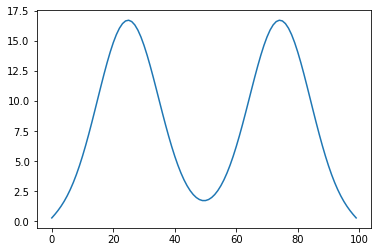

In [97]:
# double well

t = 1.0
N = 100

x = np.linspace(-N/2,N/2,N)/N
V = [(ele+0.25)**2  if ele < 0 else (ele-0.25)**2 for ele in x]
H = np.diag(2*t*np.ones(N)) + np.diag(-t*np.ones(N-1),-1) + np.diag(-t*np.ones(N-1),1) + np.diag(V) 

vec = np.random.rand(H.shape[0])
old_vec = vec.copy() 

iter_max = 10000
for i in range(iter_max):
    # for largest energy state
    #vec = H @ vec/np.linalg.norm(vec)
    
    # for GS
    vec = np.linalg.solve(H,vec/np.linalg.norm(vec))
    err = np.linalg.norm(vec-old_vec)
    old_vec = vec
    if err < 1e-8:
        print(i,err)
        break
plt.plot(vec)
print("energy",(vec.T @ H @ vec)/(vec.T @ vec))

386 9.653175654562999e-09
energy 0.052922143169685236


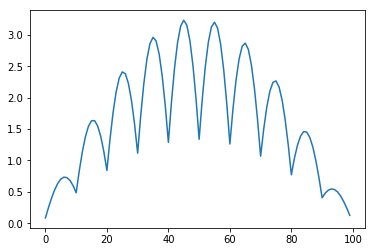

In [124]:
# delta Lattice

t = 1.0
N = 100

V = np.array([1.0 if ele % 10 == 0 else 0.0 for ele in range(N)]) 
H = np.diag(2*t*np.ones(N)) + np.diag(-t*np.ones(N-1),-1) + np.diag(-t*np.ones(N-1),1) + np.diag(V) 

vec = np.random.rand(H.shape[0])
old_vec = vec.copy() 

iter_max = 10000
for i in range(iter_max):
    # for largest energy state
    #vec = H @ vec/np.linalg.norm(vec)
    
    # for GS
    vec = np.linalg.solve(H,vec/np.linalg.norm(vec))
    err = np.linalg.norm(vec-old_vec)
    old_vec = vec
    if err < 1e-8:
        print(i,err)
        break
plt.plot(vec)
print("energy",(vec.T @ H @ vec)/(vec.T @ vec))

6174 9.992410378008859e-09
energy 0.1817333696502828


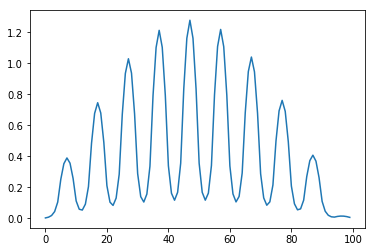

In [122]:
# finite barrier Lattice

t = 1.0
N = 100

V_unit = [1.0,1.0,1.0,1.0,1.0,0,0,0,0,0] 
V = V_unit * (N//len(V_unit))
H = np.diag(2*t*np.ones(N)) + np.diag(-t*np.ones(N-1),-1) + np.diag(-t*np.ones(N-1),1) + np.diag(V) 

vec = np.random.rand(H.shape[0])
old_vec = vec.copy() 

iter_max = 10000
for i in range(iter_max):
    # for largest energy state
    #vec = H @ vec/np.linalg.norm(vec)
    
    # for GS
    vec = np.linalg.solve(H,vec/np.linalg.norm(vec))
    err = np.linalg.norm(vec-old_vec)
    old_vec = vec
    if err < 1e-8:
        print(i,err)
        break
plt.plot(vec)
print("energy",(vec.T @ H @ vec)/(vec.T @ vec))